In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
from PIL import Image

#python code to find if all the pictures in the folder are able to load or not
def check_images_in_folder(folder_path):
    all_images_loadable = True
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                img = Image.open(os.path.join(folder_path, filename))
                img.verify()  # Verify that it is, in fact, an image
            except (IOError, SyntaxError) as e:
                print(f"Image {filename} is not loadable: {e}")
                all_images_loadable = False
    return all_images_loadable



In [ ]:
folder_path = '/content/drive/MyDrive/Panoramic radiography database'
all_images_loadable = check_images_in_folder(folder_path)
print(f"All images loadable: {all_images_loadable}")

All images loadable: True


In [ ]:
from PIL import ImageFilter
import numpy as np
def apply_median_filter_if_noisy(folder_path, threshold=100):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                img = Image.open(os.path.join(folder_path, filename))
                img_array = np.array(img)
                noise_level = np.std(img_array)

                if noise_level > threshold:
                    # img = img.filter(ImageFilter.MedianFilter(size=3))
                    # img.save(os.path.join(folder_path, filename))
                    # print(f"Applied median filter to {filename} due to noise level {noise_level}")
                    print("The image is noisy")
                else:
                    #print(f"No significant noise in {filename} (noise level: {noise_level})")
                    #print("The image is not noisy")
                    pass
            except (IOError, SyntaxError) as e:
                print(f"Image {filename} could not be processed: {e}")

apply_median_filter_if_noisy(folder_path)

In [ ]:
import cv2

import matplotlib.pyplot as plt

def display_image_before_after_contrast(folder_path, filename):
    img_path = os.path.join(folder_path, filename)

    # Read the original image
    original_img = cv2.imread(img_path, cv2.IMREAD_COLOR)

    # Convert to LAB color space
    lab = cv2.cvtColor(original_img, cv2.COLOR_BGR2LAB)

    # Split the LAB image into different channels
    l, a, b = cv2.split(lab)

    # Apply CLAHE to the L-channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv2.merge((cl, a, b))

    # Convert back to BGR color space
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    # Display the images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Contrast Image')
    plt.axis('off')

    plt.show()

# Example usage
display_image_before_after_contrast(folder_path, '1.jpg')

NameError: name 'folder_path' is not defined

In [ ]:
import cv2
import os
import numpy as np

def enhance_contrast_with_clahe(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                img_path = os.path.join(input_folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)

                # Convert to LAB color space
                lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

                # Split the LAB image into different channels
                l, a, b = cv2.split(lab)

                # Apply CLAHE to the L-channel
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
                cl = clahe.apply(l)

                # Merge the CLAHE enhanced L-channel with the a and b channel
                limg = cv2.merge((cl, a, b))

                # Convert back to BGR color space
                final_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

                # Save the enhanced image in the output folder
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, final_img)
                print(f"Enhanced contrast for {filename}")
            except Exception as e:
                print(f"Image {filename} could not be processed: {e}")

# Example usage
input_folder = folder_path
output_folder = '/content/drive/MyDrive/contrast'
enhance_contrast_with_clahe(input_folder, output_folder)


Enhanced contrast for 1.jpg
Enhanced contrast for 10.jpg
Enhanced contrast for 110.jpg
Enhanced contrast for 105.jpg
Enhanced contrast for 106.jpg
Enhanced contrast for 112.jpg
Enhanced contrast for 108.jpg
Enhanced contrast for 114.jpg
Enhanced contrast for 124.jpg
Enhanced contrast for 121.jpg
Enhanced contrast for 127.jpg
Enhanced contrast for 107.jpg
Enhanced contrast for 117.jpg
Enhanced contrast for 116.jpg
Enhanced contrast for 123.jpg
Enhanced contrast for 126.jpg
Enhanced contrast for 11.jpg
Enhanced contrast for 13.jpg
Enhanced contrast for 129.jpg
Enhanced contrast for 122.jpg
Enhanced contrast for 111.jpg
Enhanced contrast for 100.jpg
Enhanced contrast for 125.jpg
Enhanced contrast for 102.jpg
Enhanced contrast for 130.jpg
Enhanced contrast for 118.jpg
Enhanced contrast for 104.jpg
Enhanced contrast for 128.jpg
Enhanced contrast for 109.jpg
Enhanced contrast for 12.jpg
Enhanced contrast for 119.jpg
Enhanced contrast for 113.jpg
Enhanced contrast for 101.jpg
Enhanced contras

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import numpy as np

def extract_features_with_vgg16(folder_path):
    # Load the VGG16 model pre-trained on ImageNet
    base_model = VGG16(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    features = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                img_path = os.path.join(folder_path, filename)
                img = image.load_img(img_path, target_size=(224, 224))
                img_data = image.img_to_array(img)
                img_data = np.expand_dims(img_data, axis=0)
                img_data = preprocess_input(img_data)

                # Extract features
                vgg16_features = model.predict(img_data)
                features[filename] = vgg16_features
                print(f"Extracted features for {filename}")
            except Exception as e:
                print(f"Image {filename} could not be processed: {e}")

    return features

features = extract_features_with_vgg16('/content/drive/MyDrive/contrast')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
Extracted features for 1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
Extracted features for 10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
Extracted features for 110.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
Extracted features for 105.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
Extracted features for 106.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Extracted features for 112.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
Extracted features for 108.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
Extracted features for 114.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
Extracted features for 124.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
Extracted features for 121.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
Extracted features for 127.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
Extracted features for 107.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
Extracted features for 117.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
Extr

In [ ]:
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import numpy as np
import os

def extract_features_with_vgg19(folder_path):
    base_model = VGG19(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    features = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                img_path = os.path.join(folder_path, filename)
                img = image.load_img(img_path, target_size=(224, 224))
                img_data = image.img_to_array(img)
                img_data = np.expand_dims(img_data, axis=0)
                img_data = preprocess_input(img_data)

                # Extract features
                vgg19_features = model.predict(img_data)
                features[filename] = vgg19_features
                print(f"Extracted features for {filename}")
            except Exception as e:
                print(f"Image {filename} could not be processed: {e}")

    return features

# Usage
features = extract_features_with_vgg19('/content/drive/MyDrive/vgg19')


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import os

def extract_features_with_efficientnet(folder_path):
    base_model = EfficientNetB0(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('top_dropout').output)
    features = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                img_path = os.path.join(folder_path, filename)
                img = image.load_img(img_path, target_size=(224, 224))
                img_data = image.img_to_array(img)
                img_data = np.expand_dims(img_data, axis=0)
                img_data = preprocess_input(img_data)

                # Extract features
                effnet_features = model.predict(img_data)
                features[filename] = effnet_features
                print(f"Extracted features for {filename}")
            except Exception as e:
                print(f"Image {filename} could not be processed: {e}")

    return features

# Usage
features = extract_features_with_efficientnet('/content/drive/MyDrive/efficientnet')


In [ ]:
# import os
# from keras.applications.vgg16 import VGG16, preprocess_input
# from keras.preprocessing import image
# from keras.models import Model
# import numpy as np

# def extract_features_with_vgg16(folder_path, output_file):
#     # Load the VGG16 model pre-trained on ImageNet
#     base_model = VGG16(weights='imagenet')
#     model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

#     features = {}
#     i=0
#     for filename in os.listdir(folder_path):
#       if i==10:
#         break
#       else:
#         i+=1
#         if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
#             try:
#                 img_path = os.path.join(folder_path, filename)
#                 img = image.load_img(img_path, target_size=(224, 224))
#                 img_data = image.img_to_array(img)
#                 img_data = np.expand_dims(img_data, axis=0)
#                 img_data = preprocess_input(img_data)

#                 # Extract features
#                 vgg16_features = model.predict(img_data)
#                 features[filename] = vgg16_features
#                 print(f"Extracted features for {filename}")
#             except Exception as e:
#                 print(f"Image {filename} could not be processed: {e}")

#     # Save the features to a .npy file
#     np.save(output_file, features)
#     print(f"Features saved to {output_file}")

#     return features

# # Example usage
# folder_path = '/content/drive/MyDrive/contrast'
# output_file = '/content/drive/MyDrive/features.npy'
# features = extract_features_with_vgg16(folder_path, output_file)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
Extracted features for 1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
Extracted features for 10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
Extracted features for 110.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
Extracted features for 105.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
Extracted features for 106.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
Extracted features for 112.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
Extracted features for 108.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
Extracted features for 114.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Extracted features for 124.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Extracted features for 121.jpg
Features saved to /content/drive/MyDrive/features.npy


In [ ]:
# # prompt: read first 10 lines of a npy file

# import numpy as np

# def read_first_10_lines_npy(file_path):
#     try:
#         data = np.load(file_path, allow_pickle=True).item()
#         first_10_keys = list(data.keys())[:10]
#         for key in first_10_keys:
#           print(f"Key: {key}, Value shape: {data[key].shape}")
#     except Exception as e:
#         print(f"Error reading file: {e}")


# # Example usage
# file_path = '/content/drive/MyDrive/features.npy'  # Replace with your file path
# read_first_10_lines_npy(file_path)

Key: 1.jpg, Value shape: (1, 4096)
Key: 10.jpg, Value shape: (1, 4096)
Key: 110.jpg, Value shape: (1, 4096)
Key: 105.jpg, Value shape: (1, 4096)
Key: 106.jpg, Value shape: (1, 4096)
Key: 112.jpg, Value shape: (1, 4096)
Key: 108.jpg, Value shape: (1, 4096)
Key: 114.jpg, Value shape: (1, 4096)
Key: 124.jpg, Value shape: (1, 4096)
Key: 121.jpg, Value shape: (1, 4096)


In [ ]:
print(features)

{'1.jpg': array([[0.       , 0.       , 1.1187919, ..., 9.529327 , 0.       ,
        1.6653199]], dtype=float32), '10.jpg': array([[0.       , 0.       , 7.5629315, ..., 7.3419557, 0.       ,
        0.       ]], dtype=float32), '110.jpg': array([[0.       , 0.       , 5.7211227, ..., 2.1035073, 0.       ,
        0.       ]], dtype=float32), '105.jpg': array([[ 0.      ,  0.      ,  3.446257, ..., 10.00394 ,  0.      ,
         0.      ]], dtype=float32), '106.jpg': array([[0.        , 0.        , 0.        , ..., 8.1697855 , 0.        ,
        0.38869938]], dtype=float32), '112.jpg': array([[0.      , 0.      , 6.961602, ..., 0.      , 0.      , 2.700488]],
      dtype=float32), '108.jpg': array([[0.       , 0.       , 2.352573 , ..., 6.7849636, 0.       ,
        0.       ]], dtype=float32), '114.jpg': array([[0.      , 0.      , 0.      , ..., 8.910187, 0.      , 0.      ]],
      dtype=float32), '124.jpg': array([[0.       , 0.       , 1.9651276, ..., 7.488754 , 0.       ,
     

In [ ]:
# prompt: what is the next preprocessing step we have to do for the image

import numpy as np

def normalize_features(features):
    """Normalizes the extracted features.

    Args:
        features: A dictionary where keys are filenames and values are feature vectors.

    Returns:
        A dictionary with normalized feature vectors.
    """
    normalized_features = {}
    for filename, feature_vector in features.items():
        # Normalize the feature vector (example: min-max normalization)
        min_val = np.min(feature_vector)
        max_val = np.max(feature_vector)
        normalized_vector = (feature_vector - min_val) / (max_val - min_val)
        normalized_features[filename] = normalized_vector
    return normalized_features

normalized_features = normalize_features(features)
normalized_features

{'1.jpg': array([[0.        , 0.        , 0.04156195, ..., 0.35400456, 0.        ,
         0.06186489]], dtype=float32),
 '10.jpg': array([[0.        , 0.        , 0.3225902 , ..., 0.31316468, 0.        ,
         0.        ]], dtype=float32),
 '110.jpg': array([[0.        , 0.        , 0.24298222, ..., 0.08933821, 0.        ,
         0.        ]], dtype=float32),
 '105.jpg': array([[0.        , 0.        , 0.16602616, ..., 0.4819477 , 0.        ,
         0.        ]], dtype=float32),
 '106.jpg': array([[0.        , 0.        , 0.        , ..., 0.3392468 , 0.        ,
         0.01614057]], dtype=float32),
 '112.jpg': array([[0.        , 0.        , 0.3107917 , ..., 0.        , 0.        ,
         0.12055978]], dtype=float32),
 '108.jpg': array([[0.        , 0.        , 0.08386725, ..., 0.24187826, 0.        ,
         0.        ]], dtype=float32),
 '114.jpg': array([[0.        , 0.        , 0.        , ..., 0.35178718, 0.        ,
         0.        ]], dtype=float32),
 '124.jpg':

In [ ]:

def reduce_dimensionality(features, method='PCA', n_components=10):
    """Reduces the dimensionality of the extracted features.

    Args:
        features: A dictionary where keys are filenames and values are feature vectors.
        method: The dimensionality reduction method to use ('PCA' or 't-SNE').
        n_components: The number of components to keep (must be <= number of features or samples).

    Returns:
        A dictionary with reduced-dimensionality feature vectors.
    """

    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

    feature_vectors = np.array(list(features.values()))
    feature_vectors = feature_vectors.reshape(feature_vectors.shape[0], -1)

    # Ensure n_components does not exceed the number of available features or samples
    max_components = min(feature_vectors.shape[0], feature_vectors.shape[1])
    if n_components > max_components:
        print(f"n_components={n_components} is too large. Reducing to {max_components}.")
        n_components = max_components

    if method == 'PCA':
        pca = PCA(n_components=n_components)
        reduced_features_array = pca.fit_transform(feature_vectors)
    elif method == 't-SNE':
        tsne = TSNE(n_components=n_components)
        reduced_features_array = tsne.fit_transform(feature_vectors)
    else:
        raise ValueError("Invalid dimensionality reduction method.")

    reduced_features = {}
    for i, filename in enumerate(features.keys()):
        reduced_features[filename] = reduced_features_array[i]

    return reduced_features

# Test with valid n_components
reduced_features = reduce_dimensionality(normalized_features, n_components=10)


In [ ]:
print(reduced_features)

{'1.jpg': array([ 1.9593083e+00,  1.0640732e-01,  1.4293025e+00,  2.4081900e+00,
       -2.4586489e+00,  1.3205794e+00,  9.1391641e-01, -1.6856724e+00,
       -4.9982572e-01,  5.8817511e-07], dtype=float32), '10.jpg': array([-3.7691340e-01,  4.1859612e+00,  1.1313976e+00, -2.7065365e+00,
       -1.3438144e+00,  7.9524410e-01, -1.3892014e+00,  3.0698398e-01,
        4.6707457e-03,  5.8817494e-07], dtype=float32), '110.jpg': array([-1.3503836e-01, -8.4490412e-01,  1.0785638e+00, -4.0954521e-01,
       -4.4052812e-01,  1.5215041e-01,  2.5788484e+00,  3.0181651e+00,
        8.4585361e-03,  5.8817540e-07], dtype=float32), '105.jpg': array([ 2.9073758e+00, -1.2288686e+00,  1.4870732e+00,  1.4191767e+00,
        1.1682626e+00,  2.3512709e-01, -2.3240697e+00,  1.1340146e+00,
        1.5838406e+00,  5.8817551e-07], dtype=float32), '106.jpg': array([-6.4701778e-01,  2.7498810e+00, -3.1412361e+00,  1.9841720e+00,
        1.8057683e+00,  1.2517439e+00,  8.4593575e-03,  6.0678500e-01,
       -9.793

In [ ]:
# import numpy as np

# def explain_prediction(image_features, reduced_features, image_filename):
#     """
#     Provides an explanation for a prediction based on feature importance.

#     Args:
#         image_features: The original image features (dictionary).
#         reduced_features: The dimensionality-reduced image features.
#         image_filename: The filename of the image to explain.

#     Returns:
#         A string explaining the prediction or an error message.
#     """
#     try:
#         # Find the index of the image
#         image_index = list(reduced_features.keys()).index(image_filename)

#         # Get the reduced features for the image
#         image_reduced_features = reduced_features[image_filename]
#         # Simulate feature importance (replace with actual feature importance scores)

#         feature_importance = np.abs(image_reduced_features)  # Example: absolute values

#         # Sort features by importance
#         sorted_indices = np.argsort(feature_importance)[::-1]

#         # Get top 3 important features
#         top_features = sorted_indices[:3]

#         explanation = f"Explanation for image {image_filename}:\n"
#         for i in top_features:
#             explanation += f"  - Feature {i + 1}:  Importance {feature_importance[i]:.4f} \n"  # Add feature interpretation

#         return explanation

#     except (ValueError, KeyError):
#         return f"Error: Image '{image_filename}' not found or features unavailable."


# # Example usage (assuming you have 'reduced_features' and 'features' from the previous code)
# # Replace 'image_name.jpg' with an actual filename from your dataset
# explanation = explain_prediction(features, reduced_features, '110.jpg')
# explanation

'Explanation for image 110.jpg:\n  - Feature 8:  Importance 3.0182 \n  - Feature 7:  Importance 2.5788 \n  - Feature 3:  Importance 1.0786 \n'

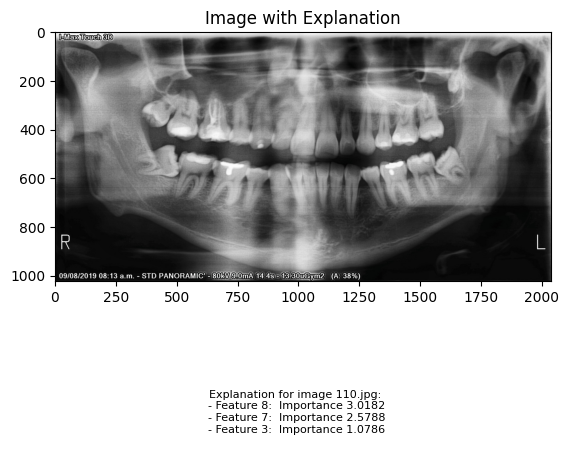

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image  # Make sure to import PIL to handle images properly

def visualize_explanation(explanation, image_path):
    """Visualizes the explanation for a prediction.

    Args:
        explanation: The explanation string from explain_prediction().
        image_path: The path to the image file.
    """
    try:
        # Open the image file using PIL
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title("Image with Explanation")

        # Extract feature importance information from the explanation
        lines = explanation.split('\n')
        feature_importances = []
        for line in lines[1:]:  # Skip the header line
            if line.strip():  # Ignore empty lines
                parts = line.split(":")
                if len(parts) > 1:
                    try:
                        feature_num = int(parts[0].split('-')[1].strip().split()[0])
                        importance_score = float(parts[1].split()[1])
                        feature_importances.append((feature_num, importance_score))
                    except (ValueError, IndexError):
                        print(f"Warning: Could not parse feature importance from line: {line}")

        # Annotate the image with the feature importances
        # Here, we simply print the explanation as text below the image.
        # You would need to adapt this to overlay the information directly onto the image if desired.
        plt.figtext(0.5, -0.1, explanation, wrap=True, horizontalalignment='center', fontsize=8)

        plt.show()

    except FileNotFoundError:
        print(f"Error: Image file '{image_path}' not found.")
    except Exception as e:
        print(f"An error occurred during visualization: {e}")

# Example usage
image_file_path = '/content/drive/MyDrive/contrast/110.jpg'  # Replace with the actual path to your image
#explanation = "Feature-1: 0.45\nFeature-2: 0.3\nFeature-3: 0.25"  # Replace with the actual explanation data
visualize_explanation(explanation, image_file_path)


In [ ]:
!git clone https://github.com/armiro/Teeth-Extraction.git

Cloning into 'Teeth-Extraction'...
remote: Enumerating objects: 601, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 601 (delta 2), reused 7 (delta 2), pack-reused 594 (from 1)
Receiving objects: 100% (601/601), 295.55 MiB | 13.26 MiB/s, done.
Resolving deltas: 100% (230/230), done.
Updating files: 100% (117/117), done.


In [ ]:
import os
# Change to the new directory
os.chdir('/content/Teeth-Extraction')

In [ ]:
!python main.py

loading image number 1
original image dimensions: (1536, 3292)
initial ROI dimensions: (732, 2038)
final ROI dimensions: (621, 1810)
elapsed time for ROI extraction & revision: 29.04 secs
/content/Teeth-Extraction/preprocessing.py:333: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  gaps = np.ones([len(sa_inv), len(sa_inv[0])], np.bool)
Traceback (most recent call last):
  File "/content/Teeth-Extraction/main.py", line 55, in <module>
    these_points = find_points(image=cropped_img_edited, num_parts=20, v_bound=50, v_stride=2)
  File "/content/Teeth-Extraction/middle_line_via_snake.py", line 52, in find_points
    prep_image = preprocessing.imfill(image=image, window_size=125, threshold=10, return_result=1)
  File "/content/Teeth-Extraction/preprocessing.py", line 333, in imfill
    gaps = np.ones([len(sa_inv), len(sa_inv[0])], np.bool)
  File "/usr/local/lib/python3.10/dist-packages/numpy/__init__.py", line 324, in __getattr__
    raise Att

<span style="font-size: 36px; font-weight: bold; background: linear-gradient(90deg, red, orange, yellow, green, blue, indigo, violet); -webkit-background-clip: text; color: transparent;">
    VISWA
</span>
